# 1. Libraries and Data Imports

In [680]:
# DataFrame libraries
import pandas as pd
import numpy as np

# Plotting imports
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# import the OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [681]:
df = pd.read_csv("255LoansTrainingSet.csv", low_memory=False)

In [682]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [683]:
df.tail()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
256979,fffef5b7-be99-4666-ac70-2a397d2ee435,7211a8e3-cba4-4132-b939-222eed8a662c,Fully Paid,3911,Short Term,NaN,2 years,Rent,NaN,Debt Consolidation,"$1,706.58",19.9,NaN,16,0,43992,44080,0.0,0.0
256980,ffffca93-aa8c-4123-b8ff-7852f6df889a,616fef0c-8f09-4327-9b5c-48fcfaa52934,Fully Paid,5078,Short Term,737.0,10+ years,Own Home,77186.0,Debt Consolidation,"$1,376.47",19.1,47.0,9,0,1717,9758,0.0,0.0
256981,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,7460.0,9 years,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.1,82.0,8,0,3315,20090,0.0,0.0
256982,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,746.0,9 years,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.1,82.0,8,0,3315,20090,0.0,0.0
256983,ffffe32e-ed17-459f-9cfd-7b9ee7972933,97281336-1e45-41d2-acb2-263ce56a590e,Fully Paid,27902,Long Term,678.0,10+ years,Home Mortgage,117480.0,Debt Consolidation,"$2,525.82",18.0,11.0,10,0,28317,62371,0.0,0.0


In [684]:
# Generate and check 5 rows selected randomly
df.sample(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
144132,8f5bebf6-6d05-47cb-a605-9d216d328c3e,3a07e69e-9ae3-4182-a075-58b5bd0987ed,Fully Paid,6007,Short Term,742.0,2 years,Home Mortgage,87624.0,Home Improvements,"$2,351.25",9.0,NaN,10,0,28663,33328,0.0,0.0
39066,26d6a8bc-2b3e-4278-b885-4403bfde415f,9cb8318a-cfcc-44a9-a1b5-2f6d47c2de8b,Fully Paid,99999999,Short Term,750.0,2 years,Home Mortgage,123975.0,Home Improvements,"$1,177.76",17.2,NaN,5,0,13842,33434,0.0,0.0
227100,e1ec4814-e236-48d1-b3af-2c844ed5453a,c6cd3c36-c0cf-4305-aea0-ff5daec263d4,Fully Paid,7350,Short Term,736.0,6 years,Home Mortgage,45936.0,Debt Consolidation,$895.75,11.0,NaN,11,0,15423,24099,0.0,0.0
243325,f245872e-4369-4e0b-bec6-a8d2def825a4,51fd07bd-f2e1-4472-8663-439335fa935a,Fully Paid,99999999,Short Term,750.0,< 1 year,Home Mortgage,49615.0,other,$665.66,30.8,NaN,9,0,7088,35798,0.0,0.0
33470,21587e28-dad4-41c2-9562-2c90049d7f5e,169db948-a342-421d-b8a0-ae379182f519,Fully Paid,9778,Short Term,743.0,9 years,Rent,51286.0,Debt Consolidation,$585.51,27.0,NaN,21,0,5293,18769,0.0,0.0


# 2. Understand the Data

In [685]:
df.shape

(256984, 19)

In [686]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

## 2.1 Change the data type as per the data definition

In [687]:
# convert categorical columns to `object` type and numerical columns to `int64` type
# use astype() to change the data type

df['Maximum Open Credit'] = pd.to_numeric(df['Maximum Open Credit'], errors = 'coerce').fillna(-1).astype('float64')

In [688]:
df['Monthly Debt'] = df['Monthly Debt'].str.replace('[$,]', '', regex=True).astype('float64')

In [689]:
df["Years of Credit History"] = df["Years of Credit History"].astype(object)

**Note:** Changed types of variables, `Maximum Open Credit`, `Monthly Debt` and `Years of Credit History`.

In [690]:
# Check the columns and the datatypes
df.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount               int64
Term                             object
Credit Score                    float64
Years in current job             object
Home Ownership                   object
Annual Income                   float64
Purpose                          object
Monthly Debt                    float64
Years of Credit History          object
Months since last delinquent    float64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [691]:
df.describe(percentiles = [.85, .869, .896, .98, 0.982])

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,963.310424,34.881450,11.106267,0.156628,1.540656e+04,3.572295e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,634.119410,21.854165,4.982982,0.460731,1.966506e+04,5.550037e+05,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-1.000000e+00,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,844.520000,32.000000,10.000000,0.000000,1.107800e+04,2.173950e+04,0.000000,0.000000
85%,3.513300e+04,748.000000,1.032059e+05,1527.681000,62.000000,16.000000,0.000000,2.565800e+04,4.713955e+04,0.000000,0.000000
86.9%,1.000000e+08,748.000000,1.086690e+05,1600.132270,64.000000,17.000000,1.000000,2.734900e+04,5.018345e+04,0.000000,0.000000
89.6%,1.000000e+08,750.000000,1.180006e+05,1720.830720,68.000000,17.000000,1.000000,3.024300e+04,5.552000e+04,1.000000,0.000000
98%,1.000000e+08,7350.000000,1.924130e+05,2639.357200,79.000000,24.000000,1.000000,5.666900e+04,1.122070e+05,1.000000,0.000000
98.2%,1.000000e+08,7360.000000,1.984600e+05,2700.021420,79.000000,24.000000,1.000000,5.980800e+04,1.173810e+05,1.000000,1.000000


**Interpretation:**
- We notice that `86.8%` of the values are 0 in column, `Number of Credit Problems`, `89.5%` of values is 0 in column, `Bankrupcies` and `98.1%` of the values are 0 in `Tax Leins`, we'll handle these later in the 'Feature Engineering' Section.
-  We can also see that 5 rows have missing values in the data, of which 4 have over 500 rows of missing data. We'll handle these in the 'Missing Value Treatment' section.

# 3. Data Cleaning

## 3.1 Remove Insignificant Variables

The columns `Loan ID`, `Customer ID` contain ids, which are redundant for further analysis. Thus, we drop the columns.

In [692]:
# 'axis = 1' drops the specified columns
df = df.drop(['Loan ID', 'Customer ID'],axis=1)

In [693]:
df.shape

(256984, 17)

## 4. Missing Value Treatment

### 4.1. Maximum Open Credit

Let's handle the `Maximum Open Credit` column first, as we filled value `-1` for NULL values during typecasting.

In [694]:
div = df['Annual Income'].where(df['Maximum Open Credit'] != 0) / df['Maximum Open Credit'].where(df['Maximum Open Credit'] != 0)

imp = div.mean()

Let's impute the value of `Maximum Open Credit` using this value

In [695]:
indices = df.index[df['Maximum Open Credit'] == -1].tolist()
print(indices)

for i in indices:
    df.loc[i, "Maximum Open Credit"] = df.loc[i, "Annual Income"]/imp
    print("imputed")

[184662, 184663, 187512, 187513]
imputed
imputed
imputed
imputed


***Check that the value is replaced:***

In [696]:
bool(len(df.index[df['Maximum Open Credit'] == -1])>0)

False

In [697]:
df["Maximum Open Credit"].isnull().sum()

1

We still have 1 NULL value in the column. Let's replace it with 0.

In [698]:
df.replace({"Maximum Open Credit": np.NaN}, 0, inplace = True)

In [699]:
df["Maximum Open Credit"].isnull().sum()

0

**Check for NULL values in the data:**

In [700]:
# check for null values using isnull().values.any()
df.isnull().values.any()

True

In [701]:
df.isnull().any()

Loan Status                     False
Current Loan Amount             False
Term                            False
Credit Score                     True
Years in current job             True
Home Ownership                  False
Annual Income                    True
Purpose                         False
Monthly Debt                    False
Years of Credit History         False
Months since last delinquent     True
Number of Open Accounts         False
Number of Credit Problems       False
Current Credit Balance          False
Maximum Open Credit             False
Bankruptcies                     True
Tax Liens                        True
dtype: bool

In [702]:
missing_values = df.isnull().sum()
missing_values

Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [703]:
total_cells = np.product(df.shape)
total_missing = missing_values.sum()

print("% of missing data in the Dataframe:", (total_missing/total_cells)*100 , "%")

% of missing data in the Dataframe: 6.312203460595395 %


### Let's plot the missing values

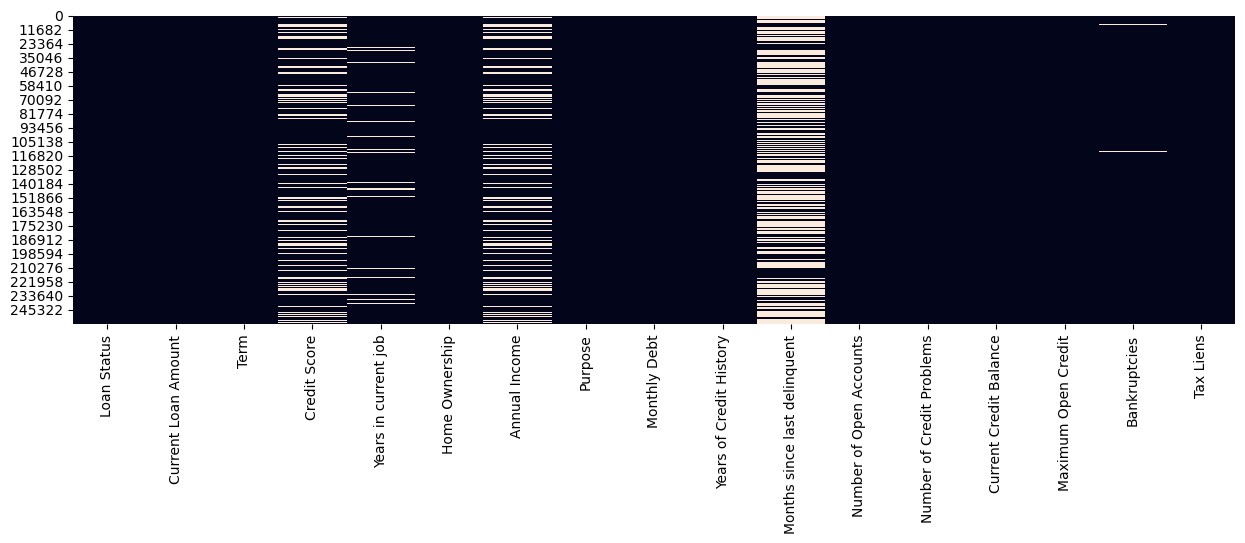

In [704]:
plt.rcParams["figure.figsize"]=[15,4]

# plot a heatmap of the missing values in the data
# cbar: specify whether to display the color index or not
sns.heatmap(df.isnull(), cbar = False)

plt.show()

Let's handle each column one at a time.

### 4.2 Months since last delinquent

As this is a defaulter column and `does not represent a usual scenario`, let's `replace the NULL values` in this column `to 0`.

In [705]:
df.replace({'Months since last delinquent': np.NaN},0, inplace = True)

In [706]:
df["Months since last delinquent"].isnull().sum()

0

### 4.3 Bankruptcies

For the same reason as the above, let's replace the NULL values in this column to 0.

In [707]:
df.replace({'Bankruptcies': np.NaN},0, inplace = True)

In [708]:
df["Bankruptcies"].isnull().sum()

0

### 4.4 Tax Liens

For the same reason as mentioned above, let's replace the NULL values in this column to 0.

In [709]:
df.replace({'Tax Liens': np.NaN},0, inplace = True)

In [710]:
df["Tax Liens"].isnull().sum()

0

### 4.5 Credit Score

Let's first assign the maximum credit score, 900, to all the NULL values, and then, consider the effect of defaulter columns on them.

In [711]:
ind = np.where(df['Credit Score'].isnull())[0]
score = 900

for i in ind:
    cr_s = score
    delq = df.loc[i, "Months since last delinquent"]
    
    if delq > 0:
        cr_s -= delq*30

    if df.loc[i, "Number of Credit Problems"] > 0:
        cr_s -= df.loc[i, "Number of Credit Problems"]*150

    if df.loc[i, "Bankruptcies"] > 0:
        cr_s -= df.loc[i, "Bankruptcies"]*200

    df.loc[i,"Credit Score"] = cr_s

In [712]:
# re-check the count of the missing data
df["Credit Score"].isnull().sum()

0

### 4.6. Annual Income

Use the `imp` value computed earlier to impute values in this column, using the data from `Maximum Open Credit` column.

In [713]:
index = np.where(df['Annual Income'].isnull())[0]

for id in index:
    df.loc[id, "Annual Income"] = df.loc[id, "Maximum Open Credit"]*imp

In [714]:
df["Annual Income"].isnull().sum()

0

### 4.7 Years In Current Job

Let's impute the NULL values in 'Years in Current Job' as `0 years`.

In [715]:
df.replace({"Years in current job": np.NaN}, 0, inplace = True)

In [716]:
df["Years in current job"].isnull().sum()

0

In [717]:
missing_values = df.isnull().sum()

# print the missing values
missing_values

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Years in current job            0
Home Ownership                  0
Annual Income                   0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

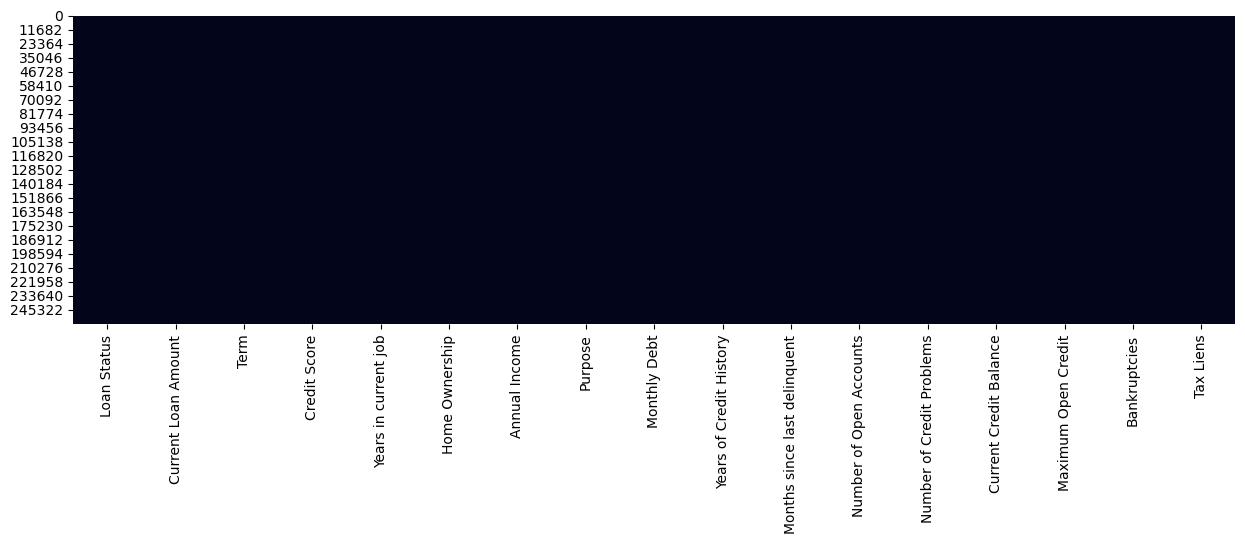

In [718]:
plt.rcParams["figure.figsize"]=[15,4]

# plot a heatmap of the missing values in the data
# cbar: specify whether to display the color index or not
sns.heatmap(df.isnull(), cbar = False)

plt.show()

**Interpretation:** We ensured that the data has no missing values.

# 5. Handling non-numeric columns

## 5.1. Loan Status - Label Encoding

In [719]:
df["Loan Status"].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [720]:
df["Loan Status"] = df["Loan Status"].astype(str)

In [721]:
labelencoder = LabelEncoder()

df['Loan Status'] = labelencoder.fit_transform(df["Loan Status"])

# display 7 observations
df.sample(7)

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
38044,1,4746,Short Term,900.0,< 1 year,Own Home,198451.084788,other,178.36,24.7,0.0,9,0,5325,56646.0,0.0,0.0
214269,0,5066,Short Term,722.0,5 years,Rent,26341.000000,Debt Consolidation,724.37,8.0,0.0,12,0,10574,12367.0,0.0,0.0
49803,1,99999999,Long Term,640.0,4 years,Home Mortgage,64058.000000,Home Improvements,800.72,13.5,70.0,11,1,6910,16145.0,0.0,0.0
252098,1,10138,Short Term,748.0,< 1 year,Home Mortgage,91242.000000,Other,574.06,28.4,0.0,9,0,1928,13485.0,0.0,0.0
195403,1,99999999,Short Term,708.0,10+ years,Home Mortgage,64220.000000,Debt Consolidation,1578.74,16.0,13.0,16,0,29015,35953.0,0.0,0.0
6953,0,29556,Long Term,550.0,10+ years,Home Mortgage,114927.582468,Debt Consolidation,1021.41,17.0,0.0,9,1,15943,32805.0,1.0,0.0
113495,0,30459,Long Term,6800.0,1 year,Home Mortgage,91377.000000,Debt Consolidation,1896.07,19.0,0.0,15,0,35342,41824.0,0.0,0.0


## 5.2. Term - Label Encoding

In [722]:
df["Term"].unique()

array(['Short Term', 'Long Term'], dtype=object)

In [723]:
df["Term"] = df["Term"].astype(str)

In [724]:
labelencoder = LabelEncoder()

df['Term'] = labelencoder.fit_transform(df["Term"])

# display 6 observations
df.sample(6)

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
117887,1,99999999,1,737.0,4 years,Rent,40812.000000,other,339.76,5.9,0.0,6,0,4199,10821.0,0.0,0.0
72575,1,5008,1,-120.0,10+ years,Home Mortgage,99607.408161,Debt Consolidation,1288.14,22.2,34.0,6,0,24594,28432.0,0.0,0.0
84449,1,24379,0,735.0,10+ years,Home Mortgage,55199.000000,Debt Consolidation,1108.58,17.5,0.0,8,0,28955,41601.0,0.0,0.0
89866,1,18940,1,746.0,8 years,Home Mortgage,51190.000000,Debt Consolidation,1074.99,12.1,0.0,18,0,7973,12081.0,0.0,0.0
196406,0,9032,1,739.0,7 years,Rent,41746.000000,Debt Consolidation,441.81,31.5,0.0,13,0,11142,19860.0,0.0,0.0
174002,0,16250,0,7160.0,10+ years,Home Mortgage,39608.000000,Debt Consolidation,917.59,24.4,36.0,15,1,16542,22754.0,1.0,0.0


## 5.3. Home Ownership - One-Hot encoding

In [725]:
# creating instance of one-hot-encoder
encode = OneHotEncoder()

# fit_transform: It returns a sparse array
# .toarray(): It returns a numpy array
df_encode = pd.DataFrame(encode.fit_transform(df[['Home Ownership']]).toarray(), columns = ['HaveMortgage', 'Hom Mortgage', 
                                                                                         'Own Home', 'Rent'])

# merge with main dataframe
df = pd.concat([df, df_encode], axis=1)

# print 20 rows of the data
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,...,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,HaveMortgage,Hom Mortgage,Own Home,Rent
0,1,11520,1,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,584.03,12.3,...,10,0,6760,16056.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,3441,1,734.0,4 years,Home Mortgage,42269.0,other,1106.04,26.3,...,17,0,6262,19149.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,21029,1,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,1321.85,28.8,...,5,0,20967,28335.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,18743,1,747.0,10+ years,Own Home,38072.0,Debt Consolidation,751.92,26.2,...,9,0,22529,43915.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,11731,1,746.0,4 years,Rent,50025.0,Debt Consolidation,355.18,11.5,...,12,0,17391,37081.0,0.0,0.0,0.0,0.0,0.0,1.0


In [726]:
df = df.drop("Home Ownership", axis = 1)

## 5.4. Purpose - One-Hot Encoding

In [727]:
df["Purpose"].unique()

array(['Debt Consolidation', 'other', 'Business Loan',
       'Home Improvements', 'Buy House', 'Other', 'Buy a Car',
       'Medical Bills', 'Take a Trip', 'Educational Expenses'],
      dtype=object)

*Combine the categories, `other` and `Other`, so that they can be considered the same category*

In [728]:
df.loc[df["Purpose"] == "other", 'Purpose'] = "Other"

In [729]:
df["Purpose"].unique()

array(['Debt Consolidation', 'Other', 'Business Loan',
       'Home Improvements', 'Buy House', 'Buy a Car', 'Medical Bills',
       'Take a Trip', 'Educational Expenses'], dtype=object)

In [730]:
df = pd.get_dummies(df, columns= ['Purpose'], drop_first = True)

In [731]:
df

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,...,Own Home,Rent,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip
0,1,11520,1,741.0,10+ years,33694.000000,584.03,12.3,41.0,10,...,0.0,0.0,False,False,True,False,False,False,False,False
1,1,3441,1,734.0,4 years,42269.000000,1106.04,26.3,0.0,17,...,0.0,0.0,False,False,False,False,False,False,True,False
2,1,21029,1,747.0,10+ years,90126.000000,1321.85,28.8,0.0,5,...,0.0,0.0,False,False,True,False,False,False,False,False
3,1,18743,1,747.0,10+ years,38072.000000,751.92,26.2,0.0,9,...,1.0,0.0,False,False,True,False,False,False,False,False
4,1,11731,1,746.0,4 years,50025.000000,355.18,11.5,0.0,12,...,0.0,1.0,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256979,1,3911,1,900.0,2 years,154427.917549,1706.58,19.9,0.0,16,...,0.0,1.0,False,False,True,False,False,False,False,False
256980,1,5078,1,737.0,10+ years,77186.000000,1376.47,19.1,47.0,9,...,1.0,0.0,False,False,True,False,False,False,False,False
256981,0,12116,1,7460.0,9 years,52504.000000,297.96,15.1,82.0,8,...,0.0,0.0,False,False,True,False,False,False,False,False
256982,0,12116,1,746.0,9 years,52504.000000,297.96,15.1,82.0,8,...,0.0,0.0,False,False,True,False,False,False,False,False


### 5.5. Years in Current Job - Label Encoding

In [732]:
df["Years in current job"].unique()

array(['10+ years', '4 years', '6 years', '5 years', 0, '3 years',
       '2 years', '< 1 year', '1 year', '7 years', '9 years', '8 years'],
      dtype=object)

In [733]:
df["Years in current job"] = df['Years in current job'].astype(str)

In [734]:
labelencoder = LabelEncoder()

df['Years in current job'] = labelencoder.fit_transform(df["Years in current job"])

# display 6 observations
df.sample(10)

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,...,Own Home,Rent,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip
135004,1,9950,1,420.0,11,44229.865224,407.99,14.0,16.0,6,...,0.0,1.0,False,False,True,False,False,False,False,False
105119,1,20838,1,741.0,2,133961.000000,1819.63,17.6,0.0,12,...,0.0,0.0,False,False,True,False,False,False,False,False
150032,1,14148,1,744.0,2,70742.000000,949.13,23.7,0.0,17,...,0.0,0.0,False,False,True,False,False,False,False,False
13130,1,7030,1,744.0,1,98421.000000,2230.88,16.8,8.0,14,...,1.0,0.0,False,False,True,False,False,False,False,False
83655,0,19175,1,748.0,3,59610.000000,660.68,11.5,0.0,16,...,1.0,0.0,False,False,True,False,False,False,False,False
190120,1,3666,1,724.0,6,47855.000000,1040.85,14.8,0.0,18,...,1.0,0.0,False,False,True,False,False,False,False,False
105635,1,31613,1,732.0,2,177822.000000,923.19,12.0,0.0,7,...,0.0,1.0,False,False,True,False,False,False,False,False
129009,1,1962,1,727.0,2,70639.000000,2019.10,12.0,0.0,7,...,0.0,0.0,False,False,False,False,False,False,False,True
11299,1,99999999,1,734.0,7,55138.000000,408.02,14.5,43.0,11,...,0.0,0.0,False,False,True,False,False,False,False,False
7557,1,99999999,1,737.0,6,72482.000000,548.45,9.4,0.0,12,...,0.0,1.0,False,False,True,False,False,False,False,False


# 6. Data Scaling

## 6.1. Current Loan Amount - MinMax Scaling

In [735]:
print(" The minimum value:",df['Current Loan Amount'].min(),"\n",
      "The maximum value:", df['Current Loan Amount'].max())

 The minimum value: 505 
 The maximum value: 99999999


In [736]:
# instantiate the MinMaxScaler
min_max = MinMaxScaler()

# fit the MinMaxScaler
df['Min_Max Current Loan Amount'] = min_max.fit_transform(df[['Current Loan Amount']])

# minimum and maximum value of the normalized variable
df['Min_Max Current Loan Amount'].min(), df['Min_Max Current Loan Amount'].max()

(0.0, 0.9999999999999999)

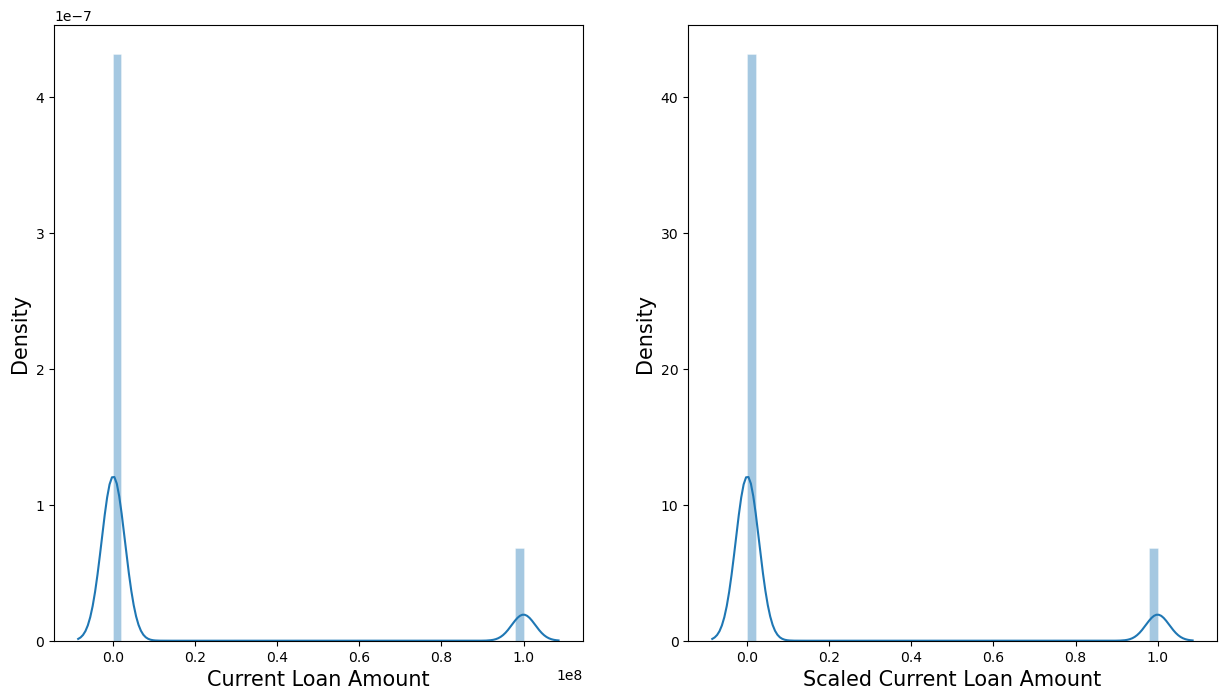

In [737]:
# set the figure size
# plt.rcParams["figure.figsize"] = [15,8]

# subplot is used to create a set of plots
# we create a subplot of 1 row by 2 columns
# use first column for plotting
# plt.subplot(1,2,1)

fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# plot the distribution of original variable
# axlabel: label the x-axis
sns.histplot(df['Current Loan Amount'], ax = axes[0], 
             kde=True, stat="density", kde_kws=dict(cut=3), 
             alpha=.4, edgecolor=(1, 1, 1, .4), bins=50)

# set label for y-axis
axes[0].set_ylabel('Density', fontsize=15)
# set label for x-axis
axes[0].set_xlabel('Current Loan Amount', fontsize=15)

# we create a subplot of 1 row by 2 columns 
# use second column for plotting
#plt.subplot(1,2,2)

# plot the distribution of scaled variable
# axlabel: label the x-axis
sns.histplot(df['Min_Max Current Loan Amount'], ax =axes[1],
            kde=True, stat="density", kde_kws=dict(cut=3),
            alpha=.4, edgecolor=(1, 1, 1, .4), bins=50)

# set label for y-axis
axes[1].set_ylabel('Density', fontsize=15)
# set label for x-axis
axes[1].set_xlabel('Scaled Current Loan Amount', fontsize=15)

# display the plot
plt.show()

## 6.2. Credit Score - StandardScaler Scaling

In [738]:
print(" The minimum value:",df['Credit Score'].min(),"\n",
      "The maximum value:", df['Credit Score'].max())

 The minimum value: -3540.0 
 The maximum value: 7510.0


In [739]:
# instantiate the standardscaler
standard_scale = StandardScaler()

# fit the StandardScaler
df['Std Credit Score'] = standard_scale.fit_transform(df[['Credit Score']])

# calculate the minimum and maximum values of the variable
print(" The minimum value:",df['Std Credit Score'].min(),"\n",
      "The maximum value:", df['Std Credit Score'].max())

 The minimum value: -2.8323111637295835 
 The maximum value: 3.998556763974638


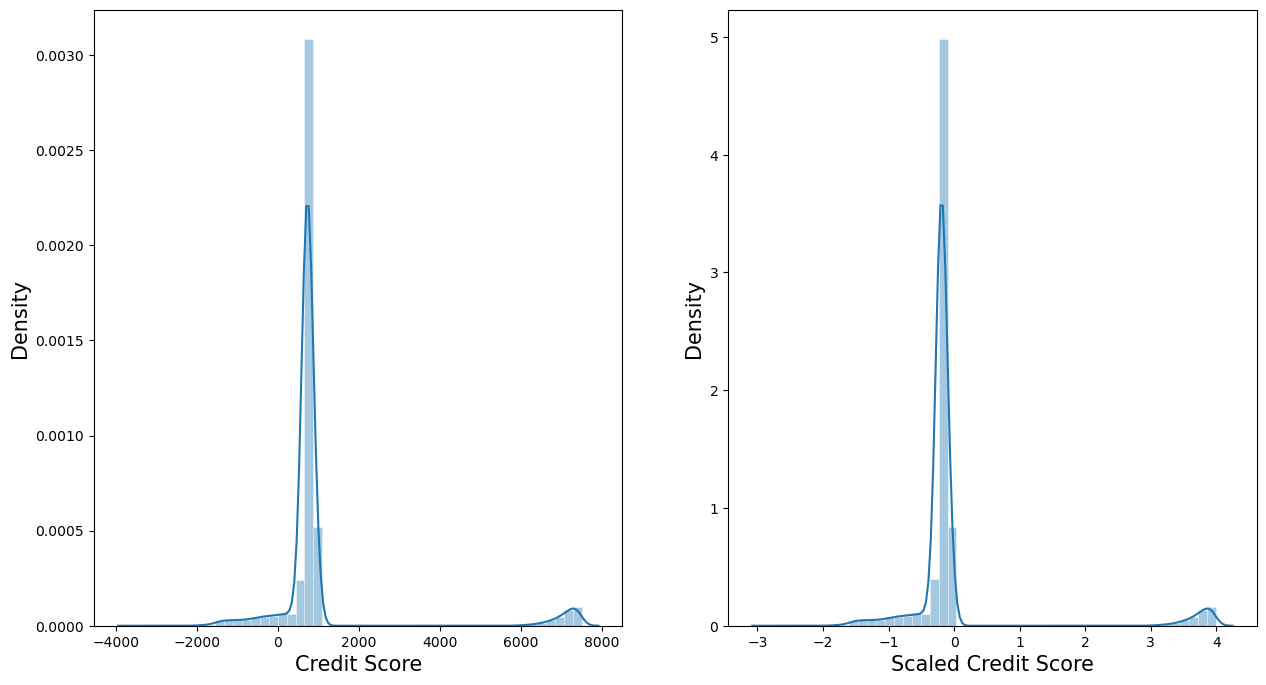

In [740]:
# Create a figure and two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# plot the distribution of original variable
# axlabel: label the x-axis
sns.histplot(df['Credit Score'], ax = axes[0],
             kde=True, stat="density", kde_kws=dict(cut=3),
             alpha=.4, edgecolor=(1, 1, 1, .4), bins=50)

# set label for y-axis
axes[0].set_ylabel('Density', fontsize=15)
# set label for x-axis
axes[0].set_xlabel('Credit Score', fontsize=15)

# we create a subplot of 1 row by 2 columns
# use second column for plotting
#plt.subplot(1,2,2)

# plot the distribution of scaled variable
# axlabel: label the x-axis
sns.histplot(df['Std Credit Score'], ax = axes[1],
             kde=True, stat="density", kde_kws=dict(cut=3),
             alpha=.4, edgecolor=(1, 1, 1, .4), bins=50)

# set label for y-axis
axes[1].set_ylabel('Density', fontsize=15)
# set label for x-axis
axes[1].set_xlabel('Scaled Credit Score', fontsize=15)
# display the plot
plt.show()

## 6.3. Annual Income - StandardScaler()

In [741]:
print(" The minimum value:",df['Annual Income'].min(),"\n",
      "The maximum value:", df['Annual Income'].max())

 The minimum value: 0.0 
 The maximum value: 60520833.39745328


In [742]:
# instantiate the standardscaler
standard_scale = StandardScaler()

# fit the StandardScaler
df['Std Annual Income'] = standard_scale.fit_transform(df[['Annual Income']])

# calculate the minimum and maximum values of the variable
print(" The minimum value:",df['Std Annual Income'].min(),"\n",
      "The maximum value:", df['Std Annual Income'].max())

 The minimum value: -0.2722763679391282 
 The maximum value: 197.83154610984775


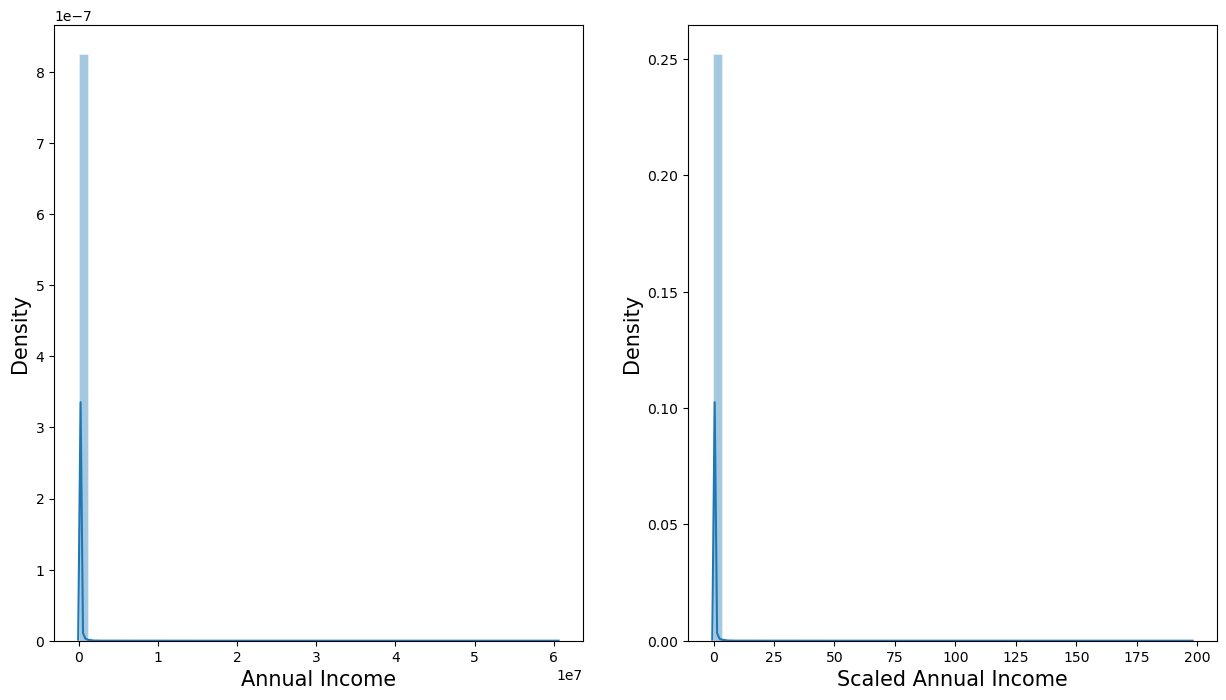

In [743]:
# Create a figure and two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# plot the distribution of original variable
# axlabel: label the x-axis
sns.histplot(df['Annual Income'], ax = axes[0],
             kde=True, stat="density", kde_kws=dict(cut=3),
             alpha=.4, edgecolor=(1, 1, 1, .4), bins=50)

# set label for y-axis
axes[0].set_ylabel('Density', fontsize=15)
# set label for x-axis
axes[0].set_xlabel('Annual Income', fontsize=15)

# we create a subplot of 1 row by 2 columns
# use second column for plotting
#plt.subplot(1,2,2)

# plot the distribution of scaled variable
# axlabel: label the x-axis
sns.histplot(df['Std Annual Income'], ax = axes[1],
             kde=True, stat="density", kde_kws=dict(cut=3),
             alpha=.4, edgecolor=(1, 1, 1, .4), bins=50)

# set label for y-axis
axes[1].set_ylabel('Density', fontsize=15)
# set label for x-axis
axes[1].set_xlabel('Scaled Annual Income', fontsize=15)
# display the plot
plt.show()

## 6.4. Current Credit Balance - Min_Max Scaling

In [744]:
print(" The minimum value:",df['Current Credit Balance'].min(),"\n",
      "The maximum value:", df['Current Credit Balance'].max())

 The minimum value: 0 
 The maximum value: 1731412


In [745]:
# instantiate the MinMaxScaler
min_max = MinMaxScaler()

# fit the MinMaxScaler
df['Min_Max Current Credit'] = min_max.fit_transform(df[['Current Credit Balance']])

# minimum and maximum value of the normalized variable
df['Min_Max Current Credit'].min(), df['Min_Max Current Credit'].max()

(0.0, 1.0)

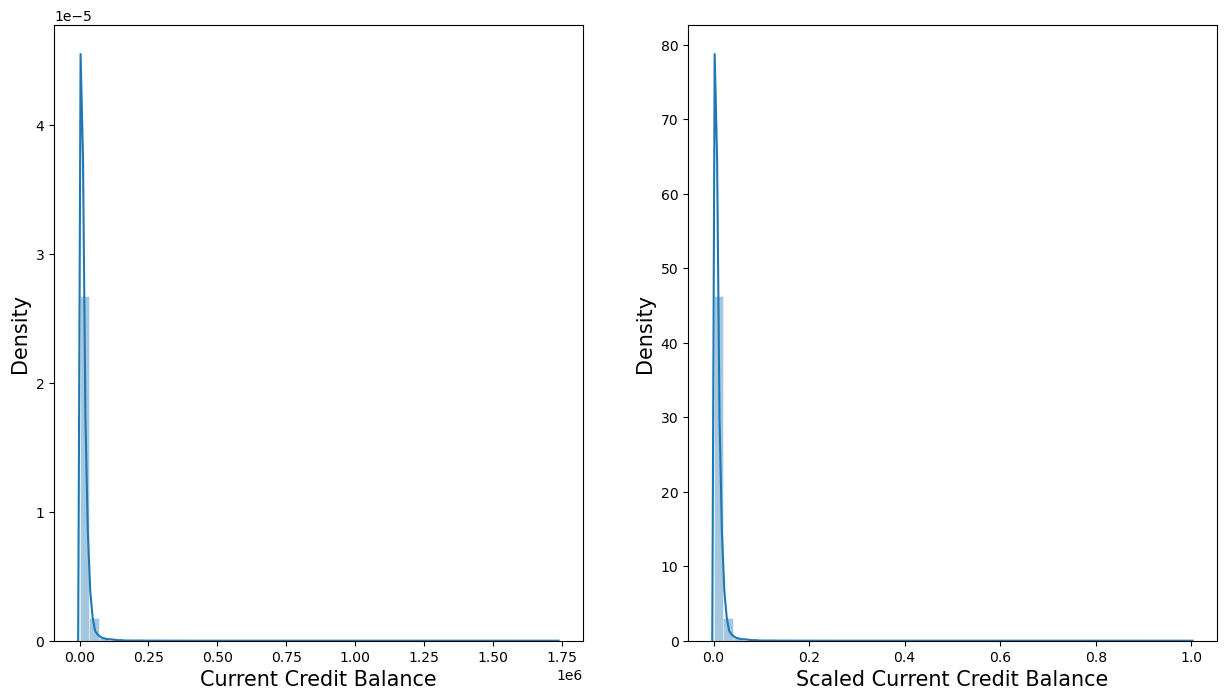

In [746]:
# set the figure size
# plt.rcParams["figure.figsize"] = [15,8]

# subplot is used to create a set of plots
# we create a subplot of 1 row by 2 columns
# use first column for plotting
# plt.subplot(1,2,1)

fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# plot the distribution of original variable
# axlabel: label the x-axis
sns.histplot(df['Current Credit Balance'], ax = axes[0], 
             kde=True, stat="density", kde_kws=dict(cut=3), 
             alpha=.4, edgecolor=(1, 1, 1, .4), bins=50)

# set label for y-axis
axes[0].set_ylabel('Density', fontsize=15)
# set label for x-axis
axes[0].set_xlabel('Current Credit Balance', fontsize=15)

# we create a subplot of 1 row by 2 columns 
# use second column for plotting
#plt.subplot(1,2,2)

# plot the distribution of scaled variable
# axlabel: label the x-axis
sns.histplot(df['Min_Max Current Credit'], ax =axes[1],
            kde=True, stat="density", kde_kws=dict(cut=3),
            alpha=.4, edgecolor=(1, 1, 1, .4), bins=50)

# set label for y-axis
axes[1].set_ylabel('Density', fontsize=15)
# set label for x-axis
axes[1].set_xlabel('Scaled Current Credit Balance', fontsize=15)

# display the plot
plt.show()

## 6.5. Maximum Open Credit - Min_Max Scaling

In [747]:
print(" The minimum value:",df['Maximum Open Credit'].min(),"\n",
      "The maximum value:", df['Maximum Open Credit'].max())

 The minimum value: 0.0 
 The maximum value: 176332155.0


In [748]:
# instantiate the MinMaxScaler
min_max = MinMaxScaler()

# fit the MinMaxScaler
df['Min_Max Max Credit'] = min_max.fit_transform(df[['Maximum Open Credit']])

# minimum and maximum value of the normalized variable
df['Min_Max Max Credit'].min(), df['Min_Max Max Credit'].max()

(0.0, 1.0)

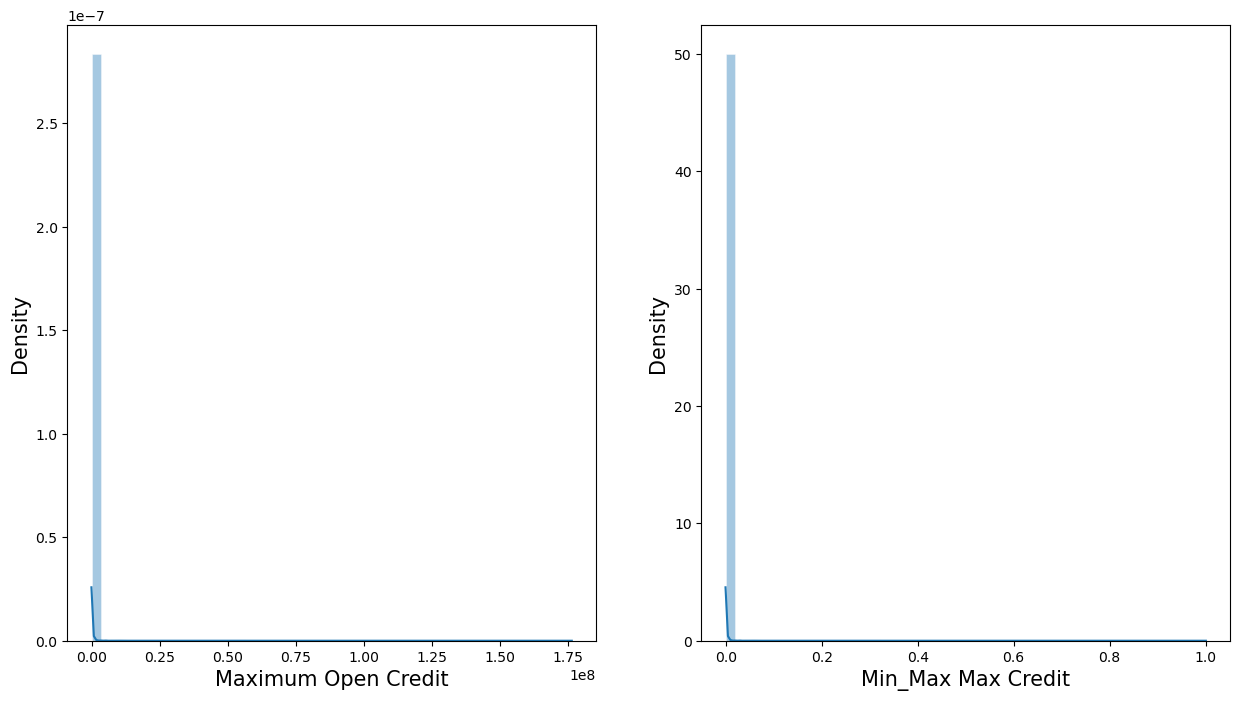

In [749]:
# set the figure size
# plt.rcParams["figure.figsize"] = [15,8]

# subplot is used to create a set of plots
# we create a subplot of 1 row by 2 columns
# use first column for plotting
# plt.subplot(1,2,1)

fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# plot the distribution of original variable
# axlabel: label the x-axis
sns.histplot(df['Maximum Open Credit'], ax = axes[0], 
             kde=True, stat="density", kde_kws=dict(cut=3), 
             alpha=.4, edgecolor=(1, 1, 1, .4), bins=50)

# set label for y-axis
axes[0].set_ylabel('Density', fontsize=15)
# set label for x-axis
axes[0].set_xlabel('Maximum Open Credit', fontsize=15)

# we create a subplot of 1 row by 2 columns 
# use second column for plotting
#plt.subplot(1,2,2)

# plot the distribution of scaled variable
# axlabel: label the x-axis
sns.histplot(df['Min_Max Max Credit'], ax =axes[1],
            kde=True, stat="density", kde_kws=dict(cut=3),
            alpha=.4, edgecolor=(1, 1, 1, .4), bins=50)

# set label for y-axis
axes[1].set_ylabel('Density', fontsize=15)
# set label for x-axis
axes[1].set_xlabel('Min_Max Max Credit', fontsize=15)

# display the plot
plt.show()

# 7. Transformation 

- Transformation is required for the columns, `Current Loan Amount` and `Credit Score`, as two peaks - one significantly big and one small- are present in the distribution of these columns.

## 7.1. Current Loan Amount - Log Transform

Skewness: 2.1112613995374
Skewness: 1.9372323761763905


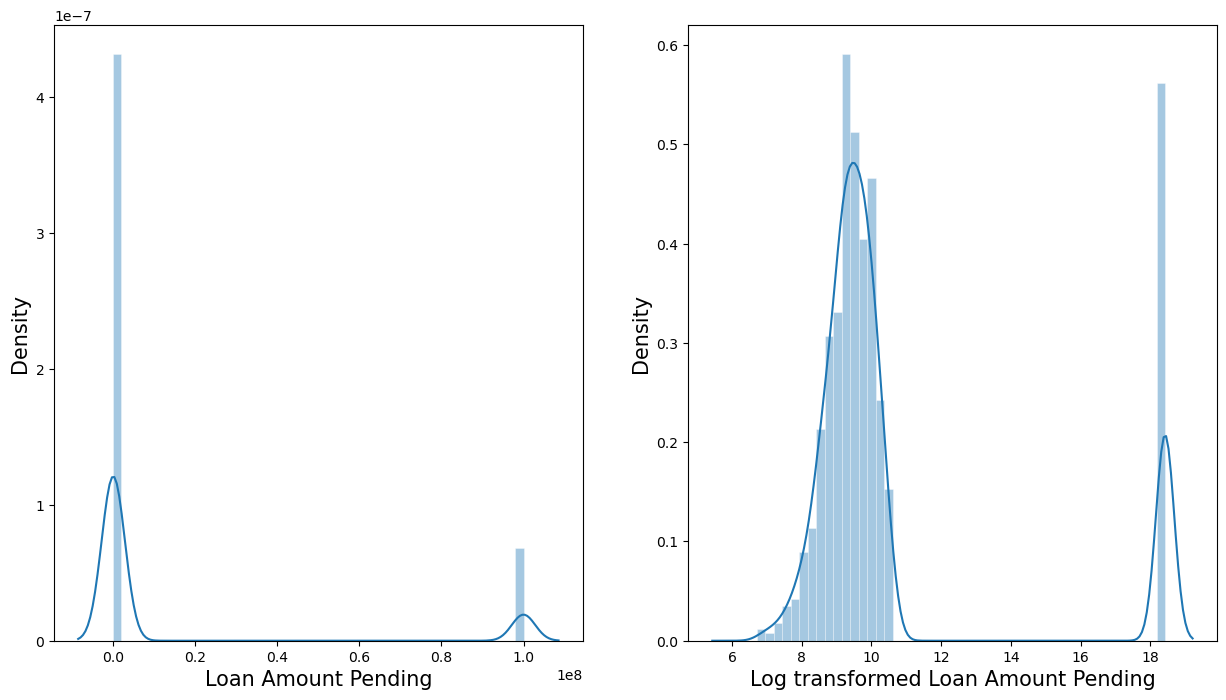

In [750]:
# set the figure size
# plt.rcParams["figure.figsize"] = [15,8]

# subplot is used to create a set of plots
# we create a subplot of 1 row by 2 columns
# use first column for plotting
# plt.subplot(1,2,1)

fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# plot the distribution of original variable
# axlabel: label the x-axis
sns.histplot(df['Current Loan Amount'], ax = axes[0],
                  kde=True, stat="density", kde_kws=dict(cut=3),
                  alpha=.4, edgecolor=(1, 1, 1, .4), bins=50)

# set the label for x-axis
axes[0].set_xlabel('Loan Amount Pending', fontsize=15)
axes[0].set_ylabel('Density', fontsize = 15)

# coefficient of skewness 
print('Skewness:', df['Current Loan Amount'].skew())

# we create a subplot of 1 row by 2 columns 
# use second column for plotting
#plt.subplot(1,2,2)

# apply natural log transformation (with base 'e')
df['Log Current Loan Amount'] = np.log(df['Current Loan Amount'])

# coefficient of skewness of transformed data
print('Skewness:', df['Log Current Loan Amount'].skew())

# plot the distribution of scaled variable
# axlabel: label the x-axis
sns.histplot(df['Log Current Loan Amount'], ax =axes[1],
            kde=True, stat="density", kde_kws=dict(cut=3),
            alpha=.4, edgecolor=(1, 1, 1, .4), bins=50)

# set label for y-axis
axes[1].set_ylabel('Density', fontsize=15)
# set label for x-axis
axes[1].set_xlabel('Log transformed Loan Amount Pending', fontsize=15)

# display the plot
plt.show()

## 7.2. Credit Score - Exponential Transform

Skewness: 3.2384039891971335
Skewness: 3.7743299061718476


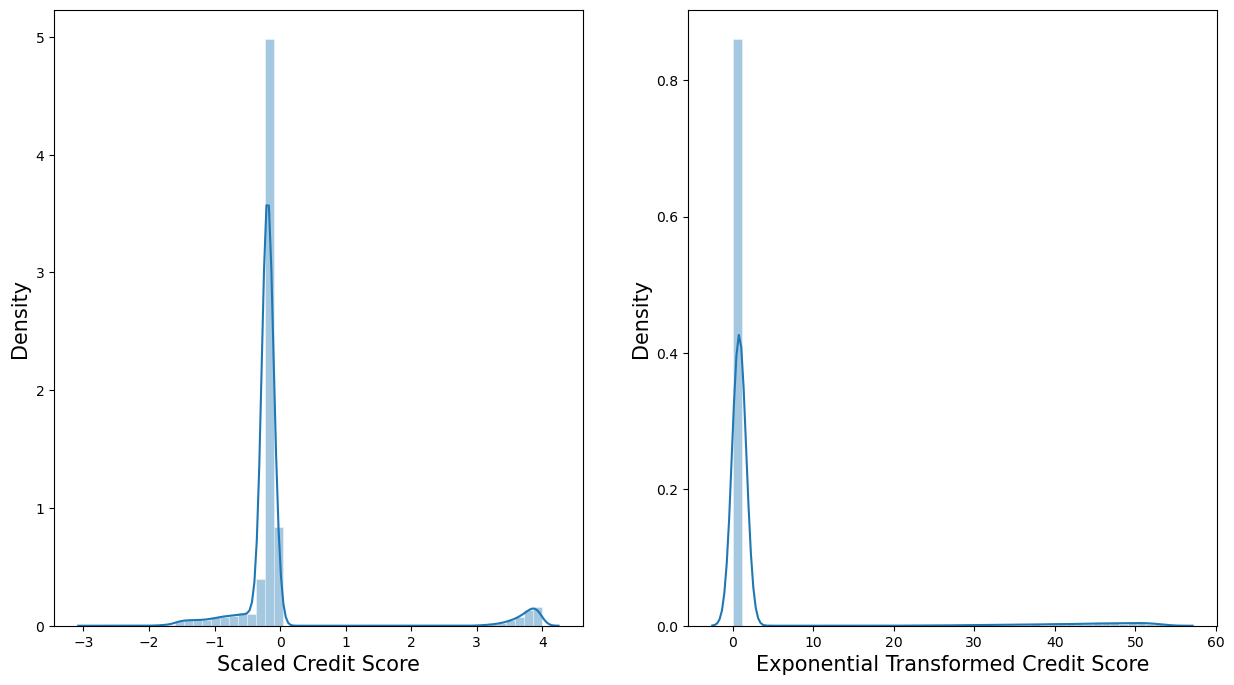

In [751]:
# set the figure size
# plt.rcParams["figure.figsize"] = [15,8]

# subplot is used to create a set of plots
# we create a subplot of 1 row by 2 columns
# use first column for plotting
# plt.subplot(1,2,1)

fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# plot the distribution of original variable
# axlabel: label the x-axis
sns.histplot(df['Std Credit Score'], ax = axes[0],
                  kde=True, stat="density", kde_kws=dict(cut=3),
                  alpha=.4, edgecolor=(1, 1, 1, .4), bins=50)

# set the label for x-axis
axes[0].set_xlabel('Scaled Credit Score', fontsize=15)
axes[0].set_ylabel('Density', fontsize = 15)

# coefficient of skewness 
print('Skewness:', df['Std Credit Score'].skew())

# we create a subplot of 1 row by 2 columns 
# use second column for plotting
#plt.subplot(1,2,2)

# apply natural log transformation (with base 'e')
df['Exp Std Credit Score'] = np.exp(df['Std Credit Score'])

# coefficient of skewness of transformed data
print('Skewness:', df['Exp Std Credit Score'].skew())

# plot the distribution of scaled variable
# axlabel: label the x-axis
sns.histplot(df['Exp Std Credit Score'], ax =axes[1],
            kde=True, stat="density", kde_kws=dict(cut=3),
            alpha=.4, edgecolor=(1, 1, 1, .4), bins=50)

# set label for y-axis
axes[1].set_ylabel('Density', fontsize=15)
# set label for x-axis
axes[1].set_xlabel('Exponential Transformed Credit Score', fontsize=15)

# display the plot
plt.show()

In [752]:
df['Current Loan Amount'] = df['Log Current Loan Amount']
df['Credit Score'] = df['Exp Std Credit Score']
df['Annual Income'] = df['Std Annual Income']
df['Current Credit Balance'] = df['Min_Max Current Credit']
df['Maximum Open Credit'] = df['Min_Max Max Credit']

In [753]:
df = df.drop(['Min_Max Current Loan Amount', 'Std Credit Score', 'Std Annual Income','Min_Max Current Credit', 'Min_Max Max Credit',
            'Log Current Loan Amount', 'Exp Std Credit Score'], axis = 1)

In [754]:
df.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Years in current job', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens', 'HaveMortgage', 'Hom Mortgage', 'Own Home', 'Rent',
       'Purpose_Buy House', 'Purpose_Buy a Car', 'Purpose_Debt Consolidation',
       'Purpose_Educational Expenses', 'Purpose_Home Improvements',
       'Purpose_Medical Bills', 'Purpose_Other', 'Purpose_Take a Trip'],
      dtype='object')

## 8. Outlier Treatment

Let's plot box-plots of all the numeric variables.

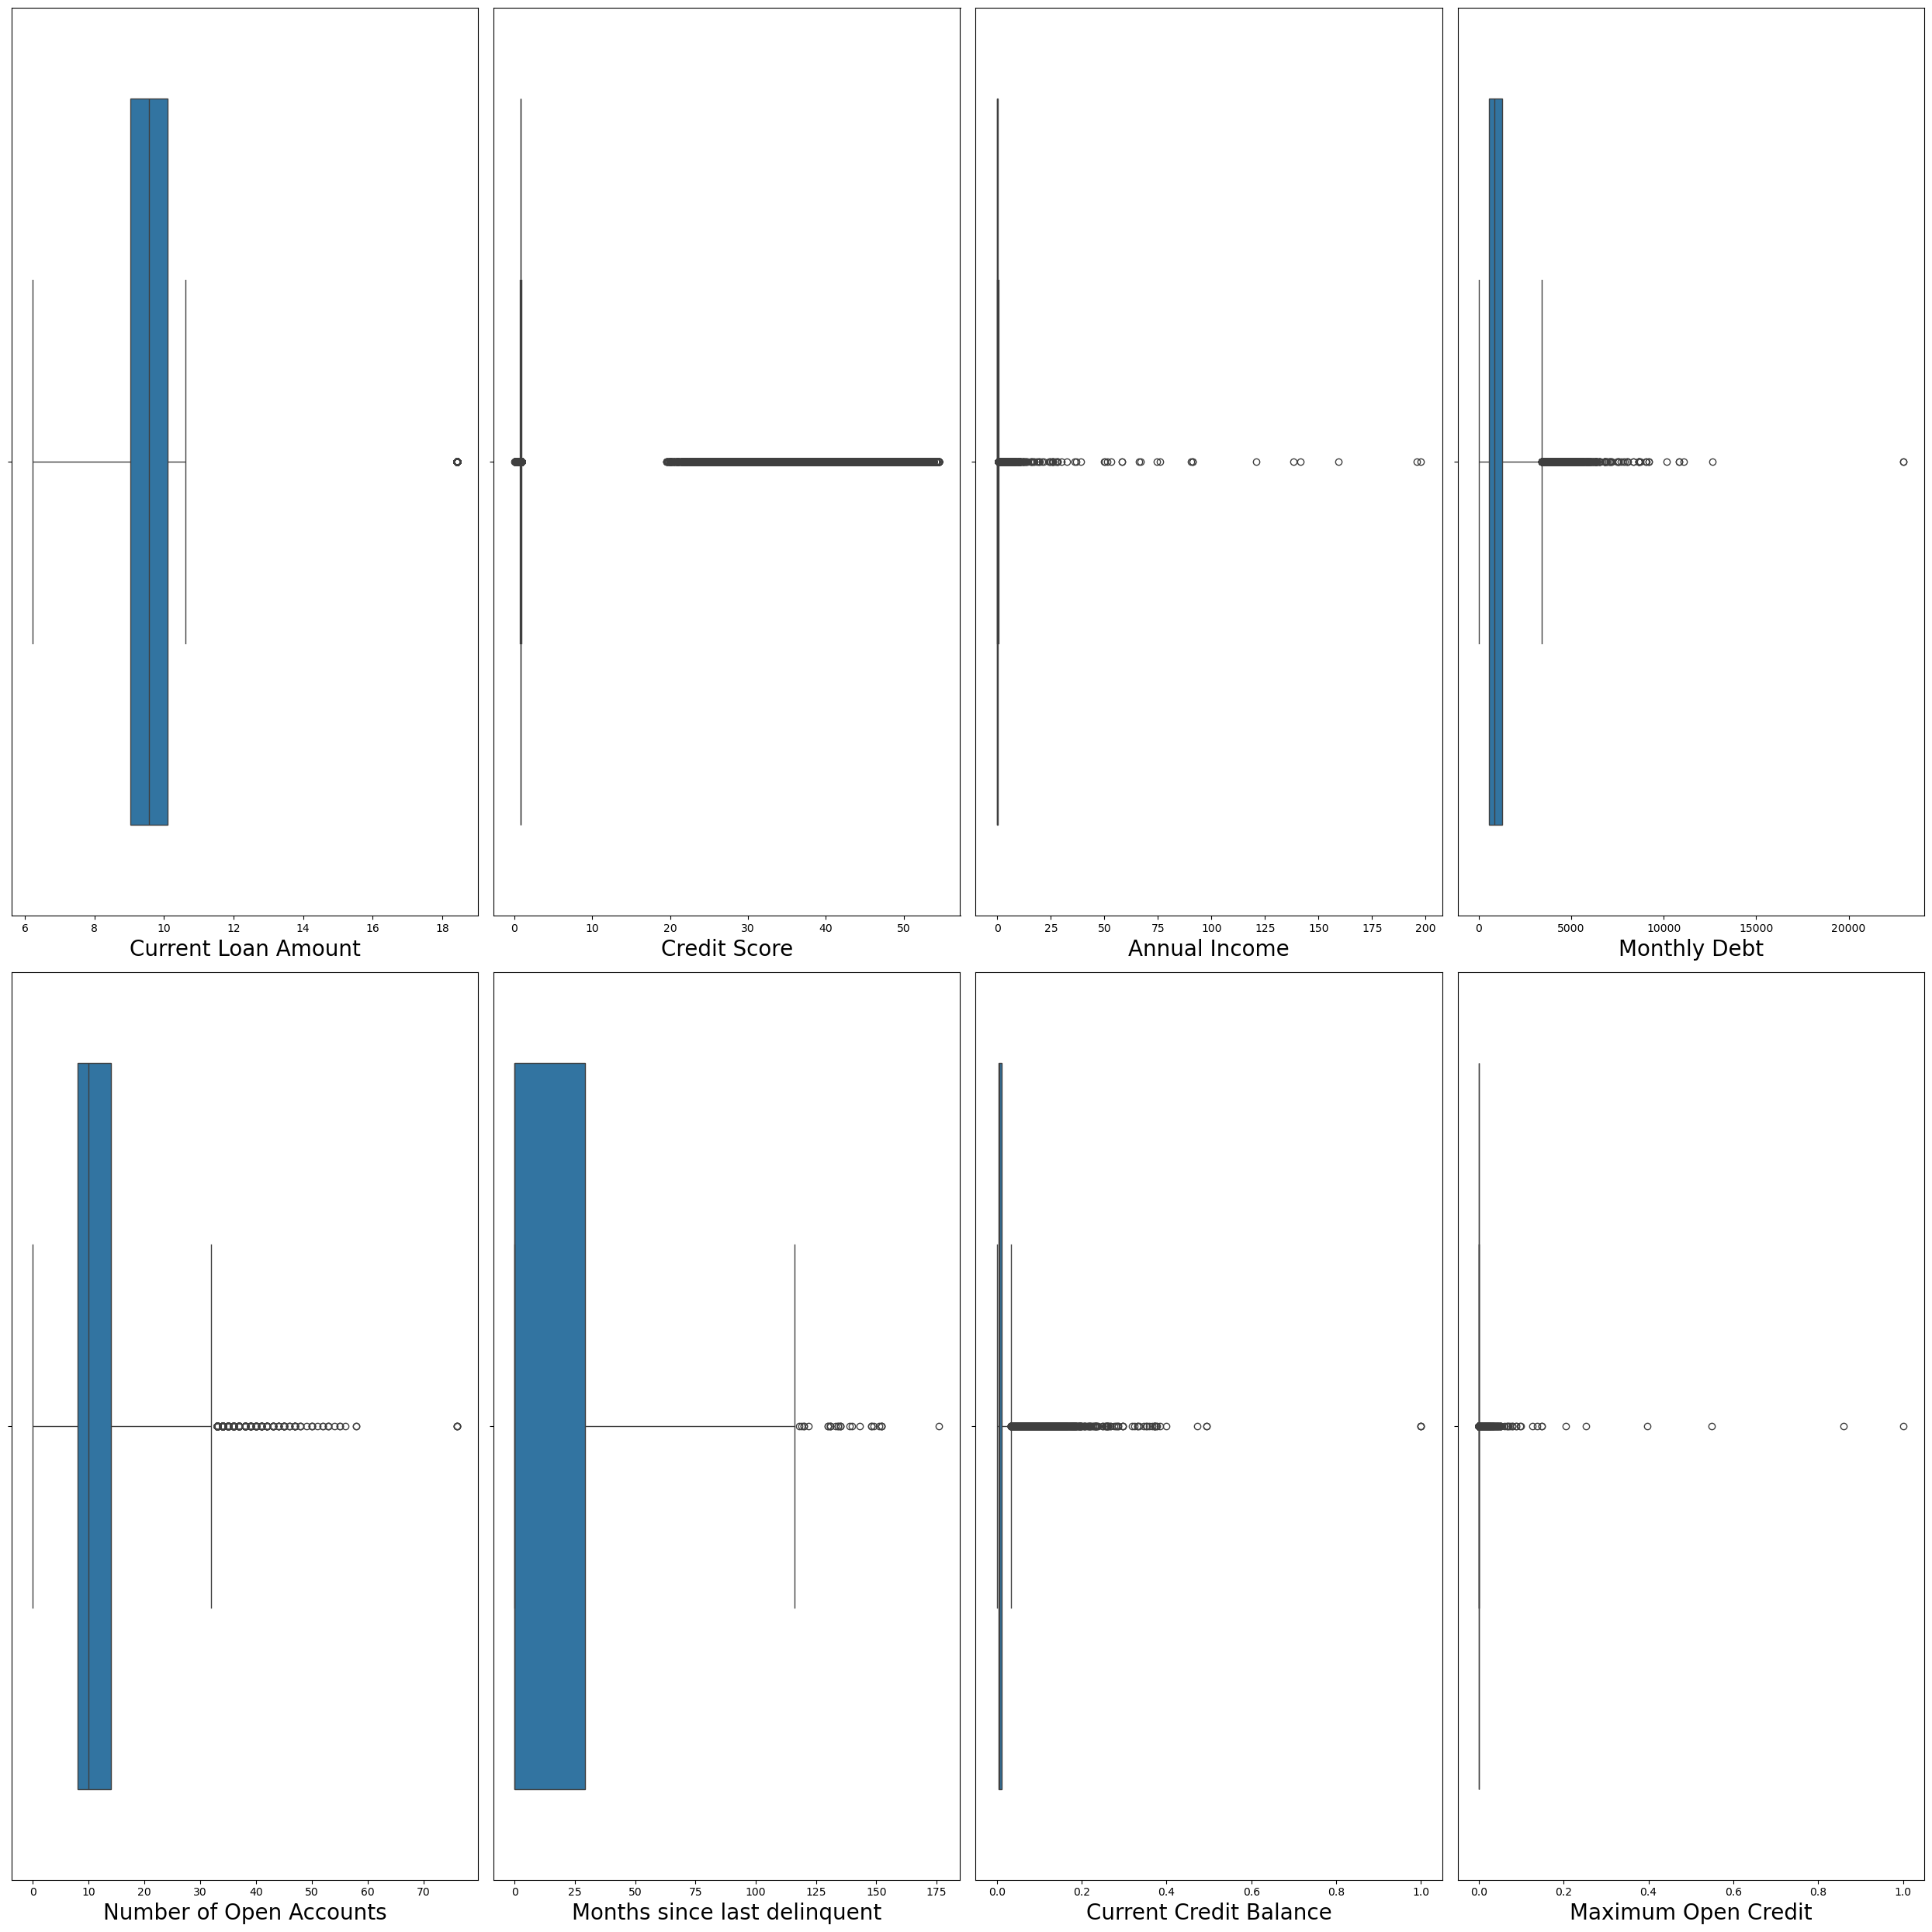

In [755]:
# Identify numeric columns
df_num = df[['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Number of Open Accounts', 'Months since last delinquent',
       'Current Credit Balance', 'Maximum Open Credit']]

# Plot the boxplot for each variable
fig, ax = plt.subplots(2, 4, figsize=(25, 25))

# Plot the boxplot using seaborn
for variable, subplot in zip(df_num, ax.flatten()):
    z = sns.boxplot(x=df[variable], orient="h", whis=3, ax=subplot)  # plot the boxplot
    z.set_xlabel(variable, fontsize=20)  # set the x-axis label

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

## 8.1 Number of Open Accounts

In [756]:
# Let us consider the 5-numbered box-plot, where the outliers exist (< Q1 - 1.5*IQR) and (> Q3 + 1.5*IQR)

col = "Number of Open Accounts"

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
print(Q3)
print(Q1)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(upper_bound)
print(lower_bound)

14.0
8.0
23.0
-1.0


Let's `cap` the number of open accounts to 23, which is the upper limit.

In [757]:
df.loc[df["Number of Open Accounts"] > 23, "Number of Open Accounts"] = 23

## 8.2. Current Loan Amount

In [758]:
col = "Current Loan Amount"

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
print(Q3)
print(Q1)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(upper_bound)
print(lower_bound)

10.100985036866753
9.023890304598448
11.71662713526921
7.40824820619599


In [759]:
df.loc[(df["Current Loan Amount"] < 7.408) | (df["Current Loan Amount"] > 11.717)]

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,...,Own Home,Rent,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip
10,1,18.420681,1,0.830878,4,-0.060296,582.84,26.8,0.0,11,...,0.0,0.0,False,False,True,False,False,False,False,False
16,1,18.420681,1,0.831906,7,-0.057530,984.07,21.0,0.0,5,...,0.0,0.0,False,False,True,False,False,False,False,False
23,1,18.420681,1,0.832420,2,-0.143059,483.58,15.4,79.0,12,...,0.0,1.0,False,False,False,False,False,False,True,False
28,1,18.420681,1,0.821684,1,-0.160011,777.38,13.6,2.0,12,...,1.0,0.0,False,False,False,False,True,False,False,False
33,1,7.267525,1,0.817630,2,0.083648,2627.76,15.1,5.0,22,...,0.0,0.0,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256938,1,18.420681,1,0.791276,9,0.082820,1365.07,20.3,0.0,13,...,0.0,0.0,False,False,False,False,True,False,False,False
256953,1,18.420681,1,0.808583,8,-0.056431,1364.97,21.5,0.0,16,...,0.0,1.0,False,False,True,False,False,False,False,False
256954,1,18.420681,1,0.830878,2,0.114394,2608.66,17.0,0.0,17,...,0.0,1.0,False,False,True,False,False,False,False,False
256963,1,18.420681,1,0.828826,2,-0.158532,833.98,11.0,25.0,17,...,0.0,1.0,False,False,True,False,False,False,False,False


We see that `37578` rows have values in the outlier range. Let's floor and cap these values to the permitted IQR range.

In [760]:
df.loc[df["Current Loan Amount"] < 7.408, "Current Loan Amount"] = 7.408
df.loc[df["Current Loan Amount"] > 11.7165, "Current Loan Amount"] = 11.7165

## 8.3. Credit Score

***We can observe from the values of the outliers of the credit score that the values are about a 100 over the permitted limit.*** *Hence, we divide the value of outliers of the column by 100.*

In [761]:
col = "Credit Score"

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
print(Q3)
print(Q1)
IQR = Q3 - Q1
lower_bound_cr_s = Q1 - 1.5 * IQR
upper_bound_cr_s = Q3 + 1.5 * IQR
print(upper_bound_cr_s)
print(lower_bound_cr_s)

0.8334499062997994
0.8110857351443358
0.8669961630329949
0.7775394784111404


In [762]:
df.loc[df["Credit Score"] > 0.865, "Credit Score"] = df["Credit Score"]/100

In [763]:
df[(df["Credit Score"] > upper_bound_cr_s) & (df["Credit Score"] < lower_bound_cr_s)].values.sum()

0

**8.4. Columns** - `'Annual Income', 'Monthly Debt', 'Current Credit Balance', 'Maximum Open Credit'`

In [764]:
df_some = df[['Annual Income', 'Monthly Debt', 'Current Credit Balance', 'Maximum Open Credit']]

# Loop through each numeric column
for col in df_some:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df.loc[df[col] < lower_bound, col] = lower_bound
    df.loc[df[col] > upper_bound, col] = upper_bound

### 8.5. Months since last delinquent

- Let's devide the value of `Months since last delinquent` by 30 and check if the outliers exist even then.

In [765]:
df["Months since last delinquent"] = df["Months since last delinquent"]/30

In [766]:
col = "Months since last delinquent"

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
print(Q3)
print(Q1)
IQR = Q3 - Q1
lower_bound_del = Q1 - 1.5 * IQR
upper_bound_del = Q3 + 1.5 * IQR
print(upper_bound)
print(lower_bound)

0.9666666666666667
0.0
0.0004041265190685159
-0.00012653109128054382


In [767]:
df[(df["Months since last delinquent"] > upper_bound_del) & (df["Months since last delinquent"] < lower_bound_del)].values.sum()

0

*We've now verified that the outliers don't exist.*

### Let's plot the boxplots of the other columns once again and confirm

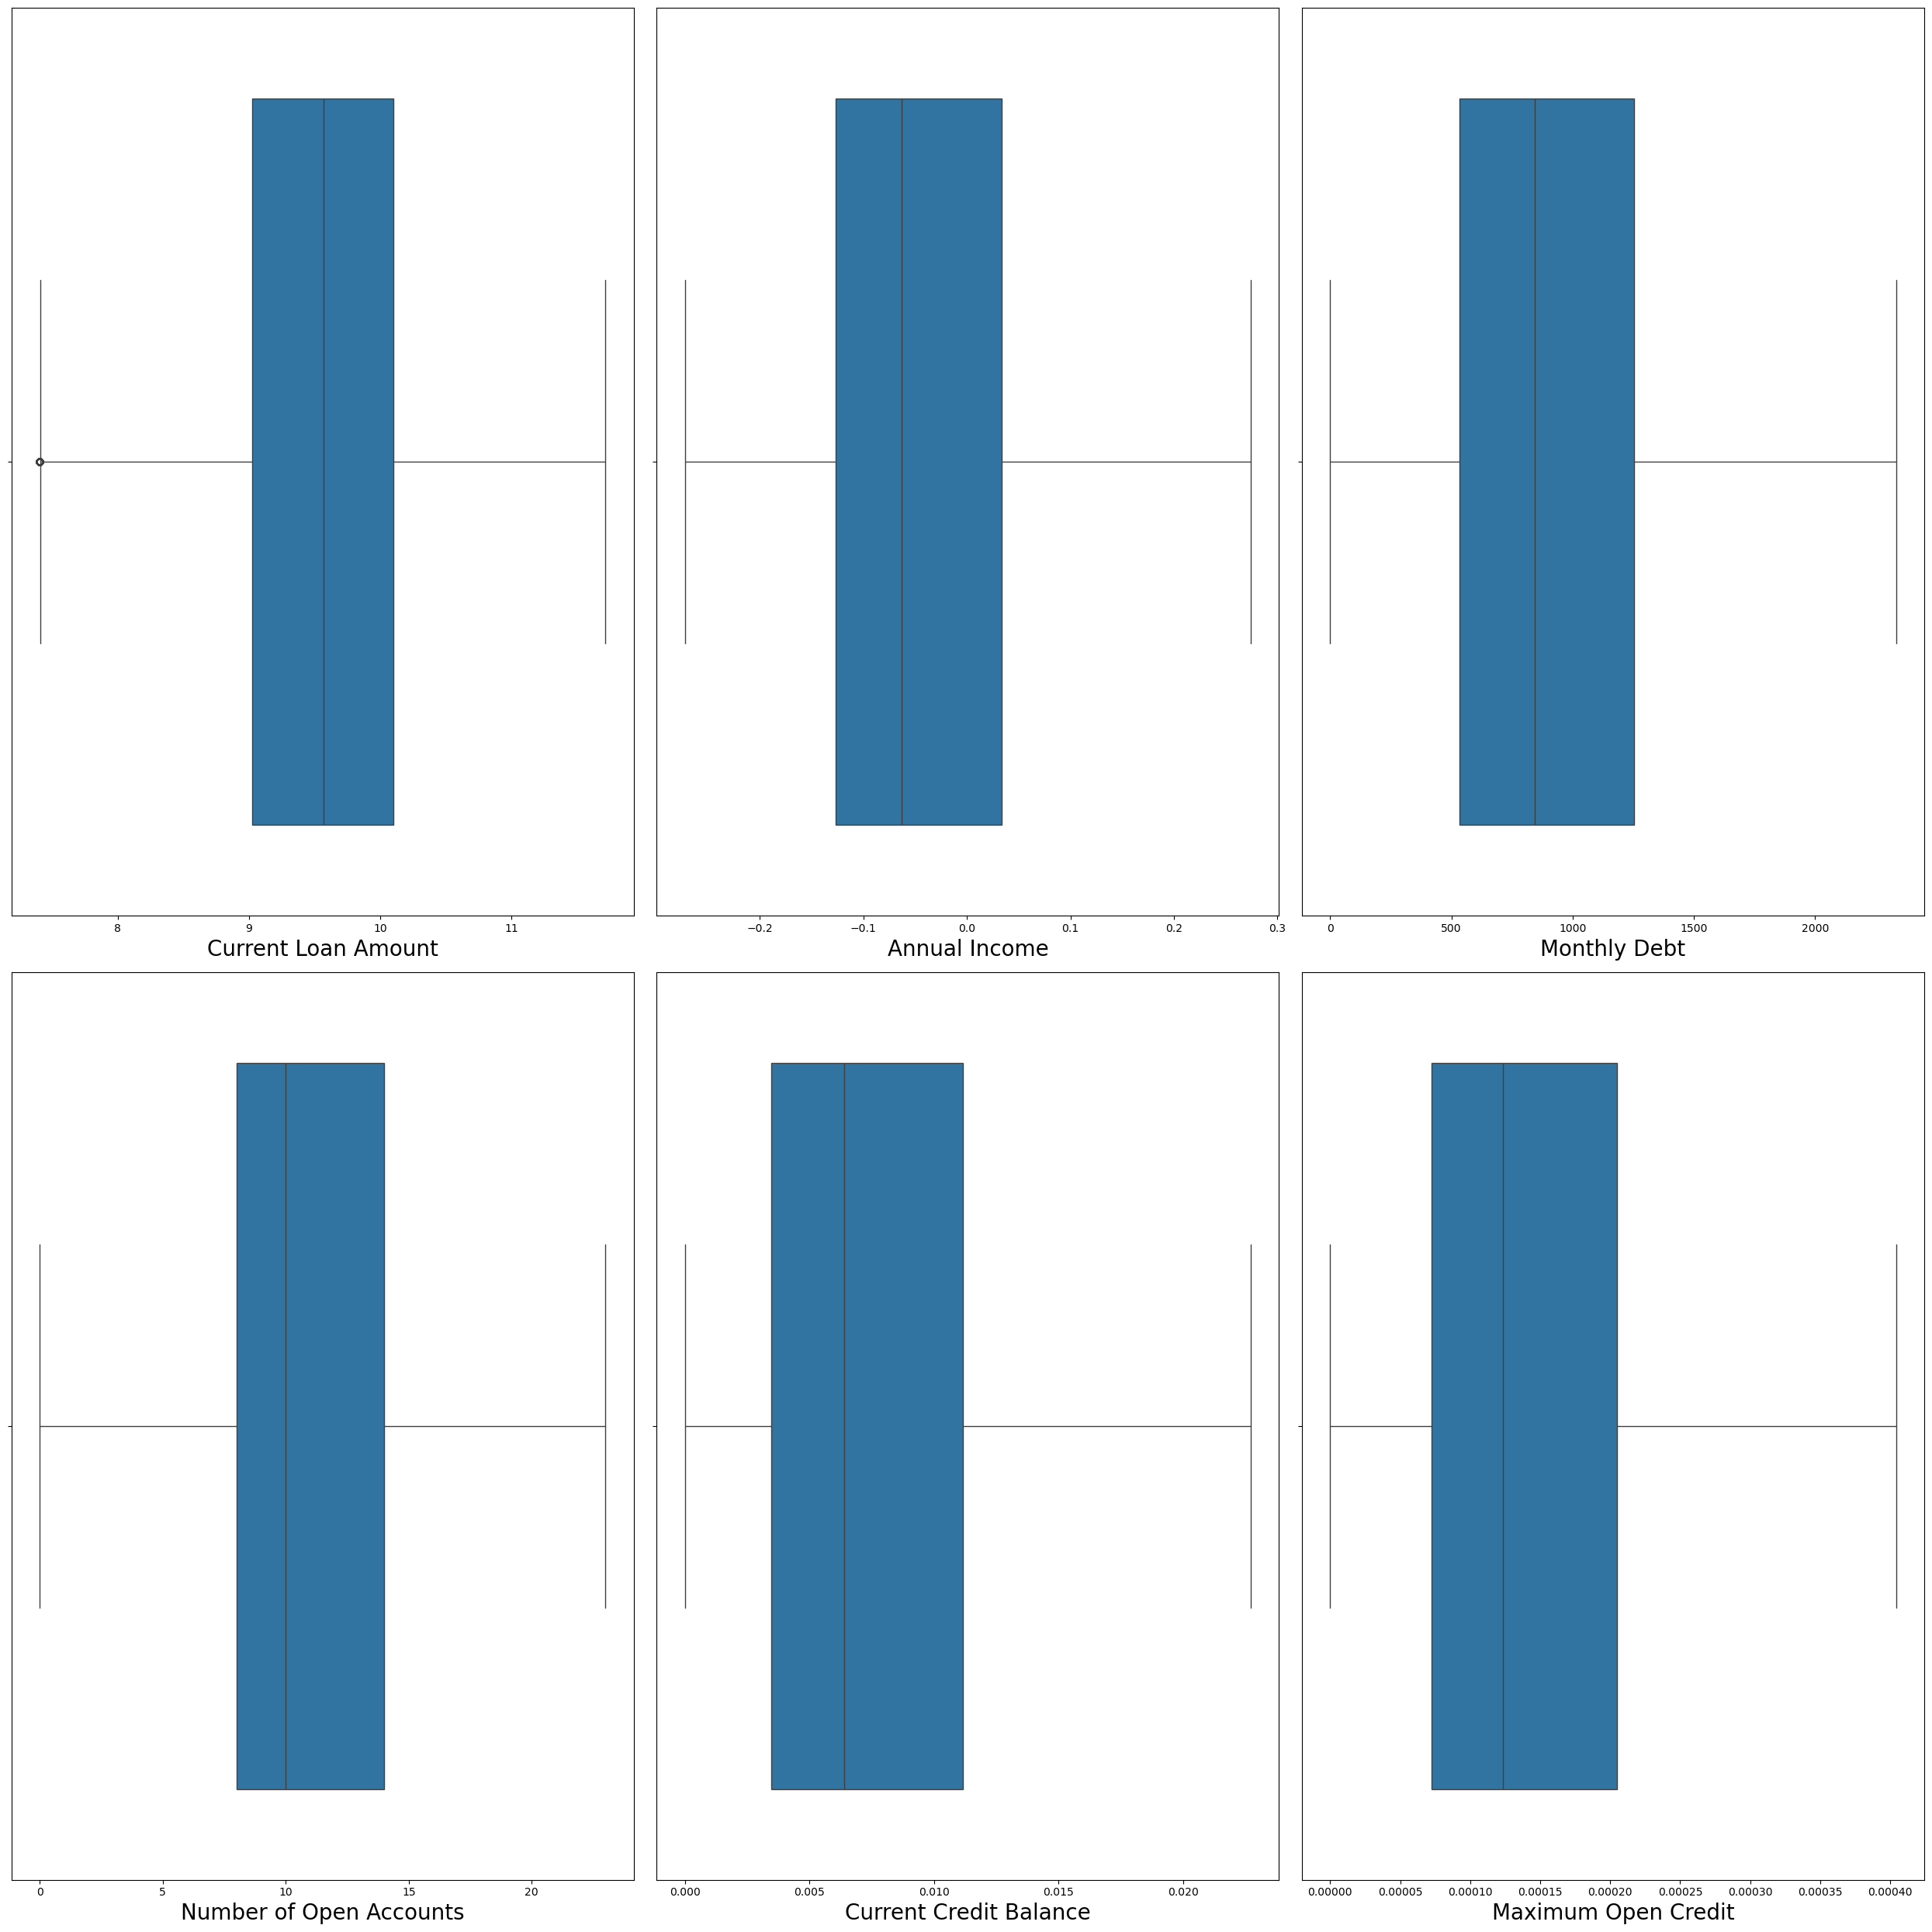

In [768]:
# Identify numeric columns
df_num = df[['Current Loan Amount', 'Annual Income', 'Monthly Debt', 'Number of Open Accounts','Current Credit Balance', 'Maximum Open Credit']]

# Plot the boxplot for each variable
fig, ax = plt.subplots(2, 3, figsize=(25, 25))

# Plot the boxplot using seaborn
for variable, subplot in zip(df_num, ax.flatten()):
    z = sns.boxplot(x=df[variable], orient="h", whis=1.5, ax=subplot)  # plot the boxplot
    z.set_xlabel(variable, fontsize=20)  # set the x-axis label

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [769]:
df.sample(25)

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,...,Own Home,Rent,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip
195106,1,9.943045,0,0.827290,2,0.052044,1221.9800,23.1,0.433333,12,...,0.0,1.0,False,False,True,False,False,False,False,False
103635,1,8.993924,1,0.587025,7,-0.023980,772.2200,15.0,0.800000,9,...,0.0,1.0,False,False,True,False,False,False,False,False
249103,1,9.809781,0,0.818136,7,0.022499,1358.3100,16.3,0.000000,12,...,0.0,0.0,False,False,True,False,False,False,False,False
235762,0,9.401043,0,0.809083,11,-0.160047,1140.0000,12.5,2.566667,14,...,1.0,0.0,False,False,True,False,False,False,False,False
208441,1,9.610726,0,0.009161,8,-0.068188,394.9000,12.0,0.000000,9,...,0.0,1.0,False,False,True,False,False,False,False,False
7213,0,8.002694,1,0.009161,11,0.062153,725.6800,23.7,0.000000,9,...,0.0,1.0,False,False,True,False,False,False,False,False
118825,0,8.718009,1,0.819654,5,-0.145576,593.5100,10.9,0.000000,14,...,0.0,1.0,False,False,True,False,False,False,False,False
245847,1,9.603395,0,0.496786,2,-0.190811,411.3800,26.1,1.100000,4,...,1.0,0.0,False,False,True,False,False,False,False,False
3908,1,7.950855,1,0.833965,7,-0.166781,606.9900,22.2,0.000000,12,...,0.0,0.0,False,True,False,False,False,False,False,False
42725,0,10.293331,0,0.780105,2,-0.059586,1239.9800,15.5,0.000000,7,...,0.0,0.0,False,False,True,False,False,False,False,False


## 9. Checking correlation between the variables

In [770]:
corr = df.corr(numeric_only = True)
corr

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Annual Income,Monthly Debt,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,...,Own Home,Rent,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip
Loan Status,1.000000,0.173544,0.183811,0.134163,0.000207,0.092042,-0.019474,-0.000343,-0.020853,-0.010179,...,-0.008300,-0.062959,0.003706,0.024949,-0.001793,0.000505,0.022265,-0.005133,-0.004531,-0.000259
Current Loan Amount,0.173544,1.000000,-0.190767,0.166016,-0.010724,0.223891,0.228097,-0.010078,0.115353,-0.036392,...,-0.020313,-0.108648,0.005074,-0.046483,0.122116,-0.017743,-0.000020,-0.049147,-0.118004,-0.056844
Term,0.183811,-0.190767,1.000000,0.050143,0.006543,-0.109723,-0.166685,0.003593,-0.081739,0.019326,...,0.010846,0.094092,-0.003370,0.011237,-0.035947,0.013622,-0.013564,0.017970,0.042976,0.031253
Credit Score,0.134163,0.166016,0.050143,1.000000,-0.013352,-0.178488,-0.004315,0.064488,0.005571,0.076922,...,-0.001832,-0.022851,-0.002941,0.002192,0.001522,-0.006585,0.010259,-0.002477,-0.003952,-0.000746
Years in current job,0.000207,-0.010724,0.006543,-0.013352,1.000000,-0.020183,-0.029187,-0.018544,-0.008008,-0.024057,...,-0.028209,0.079034,0.004677,0.011308,-0.002983,0.008138,-0.019694,-0.006584,0.012299,-0.004592
Annual Income,0.092042,0.223891,-0.109723,-0.178488,-0.020183,1.000000,0.531637,-0.009204,0.288241,-0.060673,...,-0.038904,-0.219202,0.005695,-0.022473,0.010111,-0.015100,0.059032,-0.011302,-0.052740,-0.018338
Monthly Debt,-0.019474,0.228097,-0.166685,-0.004315,-0.029187,0.531637,1.000000,0.017936,0.438460,-0.053946,...,-0.039295,-0.194815,-0.022142,-0.057911,0.112148,-0.026966,-0.007945,-0.015699,-0.094147,-0.018367
Months since last delinquent,-0.000343,-0.010078,0.003593,0.064488,-0.018544,-0.009204,0.017936,1.000000,0.037241,0.071807,...,0.002152,-0.019788,-0.002597,-0.007771,0.001573,-0.006790,0.016106,0.000101,-0.005713,-0.003966
Number of Open Accounts,-0.020853,0.115353,-0.081739,0.005571,-0.008008,0.288241,0.438460,0.037241,1.000000,-0.013553,...,-0.010888,-0.136950,-0.016022,-0.040578,0.112392,-0.015926,-0.019497,-0.018380,-0.089664,-0.018818
Number of Credit Problems,-0.010179,-0.036392,0.019326,0.076922,-0.024057,-0.060673,-0.053946,0.071807,-0.013553,1.000000,...,0.006744,-0.003146,-0.000180,-0.007838,-0.003844,-0.007293,0.023186,0.000867,-0.009268,-0.000315


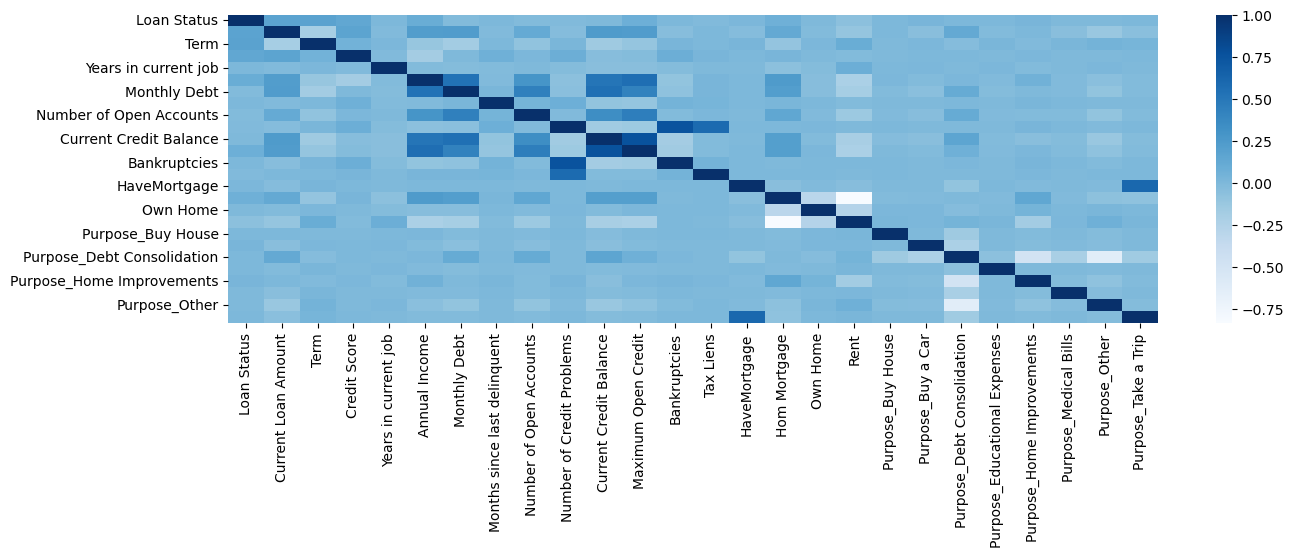

In [771]:
# Plot of the correlation
sns.heatmap(corr, cmap = "Blues")
plt.show()

**Interpretation:** We can observe that none of the columns are highly correlated.

# 10. Feature Engineering

In [772]:
df["Defaults"] = df["Months since last delinquent"] + df["Number of Credit Problems"] + df["Bankruptcies"] + df["Tax Liens"]

In [773]:
df = df.drop(["Months since last delinquent","Number of Credit Problems", "Bankruptcies","Tax Liens"], axis = 1)

In [777]:
df.sample(5)

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Current Credit Balance,...,Rent,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Defaults
218940,0,9.402612,1,0.819654,2,-0.115828,641.25,14.3,10,0.004140,...,0.0,False,False,True,False,False,False,False,False,0.633333
191078,1,11.716500,0,0.813597,11,0.023530,1656.77,20.3,13,0.005393,...,0.0,False,False,False,False,True,False,False,False,0.133333
165077,1,11.716500,0,0.795199,10,-0.139802,661.03,10.3,10,0.004422,...,0.0,False,False,False,False,False,True,False,False,0.000000
59430,0,9.547027,0,0.481789,2,-0.124948,541.24,21.6,6,0.010510,...,0.0,False,False,True,False,False,False,False,False,0.000000
188415,0,9.906483,0,0.812089,11,-0.075288,1554.65,26.8,13,0.002735,...,1.0,False,False,True,False,False,False,False,False,0.000000


# 11. Train and Test Split

In [775]:
# select the target variable
Y = df['Credit Score']

# select all the independent variables
# by dropping the target variable
X = df.drop(['Credit Score'], axis = 1)

In [776]:
# let us now split the dataset into train & test
# test_size: the proportion of data to be included in the testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=200)

# print the shape of 'x_train'
print("X_train ",X_train.shape)

# print the shape of 'x_test'
print("X_test ",X_test.shape)

# print the shape of 'y_train'
print("Y_train ",Y_train.shape)

# print the shape of 'y_test'
print("Y_test ",Y_test.shape)

X_train  (192738, 23)
X_test  (64246, 23)
Y_train  (192738,)
Y_test  (64246,)


*Thus, we've got our train and test split.*